In [ ]:
import numpy as np
import pandas as pd

import nltk
import string

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

import gensim
from gensim.utils import simple_preprocess

In [ ]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 14.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.8 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039283 sha256=cd5f45cef48432a26040128ff9717447acb6dd651b06cac66b2fa85273d03721
  Stored in di

In [ ]:
import numpy as np
import pandas as pd
import nltk
import string

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving preprocessed_data.csv to preprocessed_data.csv


In [ ]:
reviews = pd.read_csv("preprocessed_data.csv")

In [ ]:
reviews.head()

,Review,Sentiment
0,way plug unless converter,0
1,good case excellent value,1
2,great jawbone,1
3,tie charger conversation last minutesmajor pro...,0
4,mic great,1


In [ ]:
# Create a new column containing the length each review
reviews["Text_len"] = reviews["Review"].apply(lambda x : len(x.split()))

In [ ]:
print("The longest review has: {} words".format(reviews.Text_len.max()))

The longest review has: 16 words


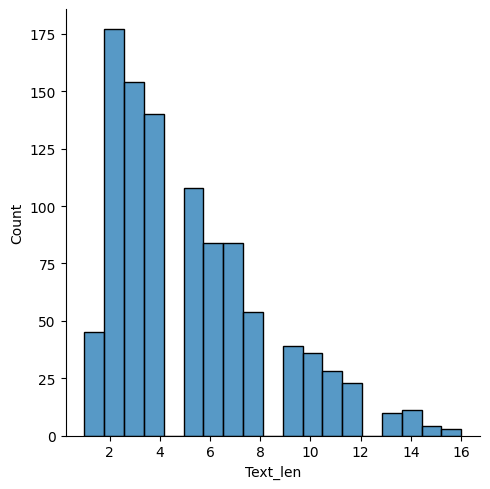

In [ ]:
# Visualize the length distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(reviews.Text_len, kde=False)

In [ ]:
#Bert topic with k-means
from bertopic import BERTopic

from sklearn.cluster import KMeans

cluster_model = KMeans(n_clusters=10)
#KMmodel = BERTopic(hdbscan_model=cluster_model)

KMmodel = BERTopic(hdbscan_model=cluster_model, verbose=True, embedding_model='paraphrase-MiniLM-L3-v2', top_n_words=10, min_topic_size= 20)
KM_topics, KMprobs = KMmodel.fit_transform(reviews.Review)

2024-01-06 12:53:24,547 - BERTopic - Embedding - Transforming documents to embeddings.


.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.01k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-01-06 12:53:52,724 - BERTopic - Embedding - Completed ✓
2024-01-06 12:53:52,727 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-06 12:54:06,441 - BERTopic - Dimensionality - Completed ✓
2024-01-06 12:54:06,443 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-06 12:54:06,570 - BERTopic - Cluster - Completed ✓
2024-01-06 12:54:06,579 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-06 12:54:06,631 - BERTopic - Representation - Completed ✓


In [ ]:
KMfreq = KMmodel.get_topic_info()
print("Number of topics: {}".format( len(KMfreq)))
KMfreq.head()

Number of topics: 10


,Topic,Count,Name,Representation,Representative_Docs
0,0,179,0_phone_great_love_get,"[phone, great, love, get, ive, work, drop, mot...","[great phone, great phone, great phone]"
1,1,147,1_case_service_fit_piece,"[case, service, fit, piece, customer, easy, us...",[bad piece crap ever along verizon customer se...
2,2,141,2_product_price_recommend_would,"[product, price, recommend, would, purchase, g...","[great product price, great product price, pri..."
3,3,135,3_work_great_disappointed_item,"[work, great, disappointed, item, good, far, p...","[work great, work great, work great]"
4,4,94,4_sound_quality_volume_hear,"[sound, quality, volume, hear, voice, talk, lo...","[excellent sound quality, poor sound quality, ..."


In [ ]:
KMfreq.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,0,179,0_phone_great_love_get,"[phone, great, love, get, ive, work, drop, mot...","[great phone, great phone, great phone]"
1,1,147,1_case_service_fit_piece,"[case, service, fit, piece, customer, easy, us...",[bad piece crap ever along verizon customer se...
2,2,141,2_product_price_recommend_would,"[product, price, recommend, would, purchase, g...","[great product price, great product price, pri..."
3,3,135,3_work_great_disappointed_item,"[work, great, disappointed, item, good, far, p...","[work great, work great, work great]"
4,4,94,4_sound_quality_volume_hear,"[sound, quality, volume, hear, voice, talk, lo...","[excellent sound quality, poor sound quality, ..."
5,5,85,5_battery_charger_charge_life,"[battery, charger, charge, life, plug, car, wo...","[new battery work great phone, battery life, b..."
6,6,71,6_camera_button_nice_palm,"[camera, button, nice, palm, keyboard, picture...",[prosgood camera nice picture also cool style ...
7,7,68,7_headset_bluetooth_reception_use,"[headset, bluetooth, reception, use, best, goo...","[best headset use, love headset jabra bluetoot..."
8,8,49,8_ear_earpiece_fit_comfortably,"[ear, earpiece, fit, comfortably, easily, comf...",[embarassing also ear hurt try push ear plug e...
9,9,31,9_waste_money_return_dont,"[waste, money, return, dont, back, time, save,...","[dont waste money, waste money, waste money]"


In [ ]:
KMmodel.visualize_barchart(top_n_topics=10, n_words = 9)

In [ ]:
KMmodel.visualize_topics()

In [ ]:
# Latent Dirichlet Allocation (LDA)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving preprocessed_data.csv to preprocessed_data.csv


In [ ]:
reviews = pd.read_csv("preprocessed_data.csv")


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic

# Step 1: Vectorize the text data
vectorizer = CountVectorizer(max_df=0.95, max_features=10)
X = vectorizer.fit_transform(reviews.Review)

In [ ]:
# Step 2: Apply Latent Dirichlet Allocation (LDA)
lda_model = LatentDirichletAllocation(n_components=10, random_state=0)
document_topics = lda_model.fit_transform(X)

In [ ]:
# Step 3: Extract topics from LDA model
lda_topics = document_topics.argmax(axis=1)

In [ ]:
# Step 4: Use BERTopic on the original text data
bert_model = BERTopic(embedding_model='paraphrase-MiniLM-L3-v2')
lda_bert_topics, lda_bert_probs = bert_model.fit_transform(reviews.Review)

.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.01k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
# Step 5: Get topic frequencies
lda_bert_freq = bert_model.get_topic_info()
print("Number of topics: {}".format(len(lda_bert_freq)))
lda_bert_freq.head()

Number of topics: 26


,Topic,Count,Name,Representation,Representative_Docs
0,-1,271,-1_use_phone_easy_drop,"[use, phone, easy, drop, work, reception, get,...","[easy use, easy use, item work great broke mon..."
1,0,89,0_sound_quality_volume_hear,"[sound, quality, volume, hear, voice, talk, au...","[excellent sound quality, poor sound quality, ..."
2,1,63,1_fit_case_nice_comfortable,"[fit, case, nice, comfortable, wear, design, q...","[fit, fit, nice design quality]"
3,2,56,2_phone_great_nokia_get,"[phone, great, nokia, get, new, work, best, ex...","[great phone, great phone, great phone]"
4,3,46,3_battery_life_original_long,"[battery, life, original, long, die, last, rec...","[battery life also great, battery life, batter..."


In [ ]:
# Step 6: Visualize the topics using a bar chart
bert_model.visualize_barchart(top_n_topics=10, n_words=9)


In [ ]:
# Step 7: Visualize the topics
bert_model.visualize_topics(top_n_topics=10)